# Problem Statement

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve,roc_auc_score


# Data Collection

In [2]:
df = pd.read_csv('train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.shape

(31647, 18)

In [6]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# Exploratory Data Analysis

In [8]:
df['subscribed'].replace({'yes':1,'no':0}, inplace = True)

In [9]:
df.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<AxesSubplot:>

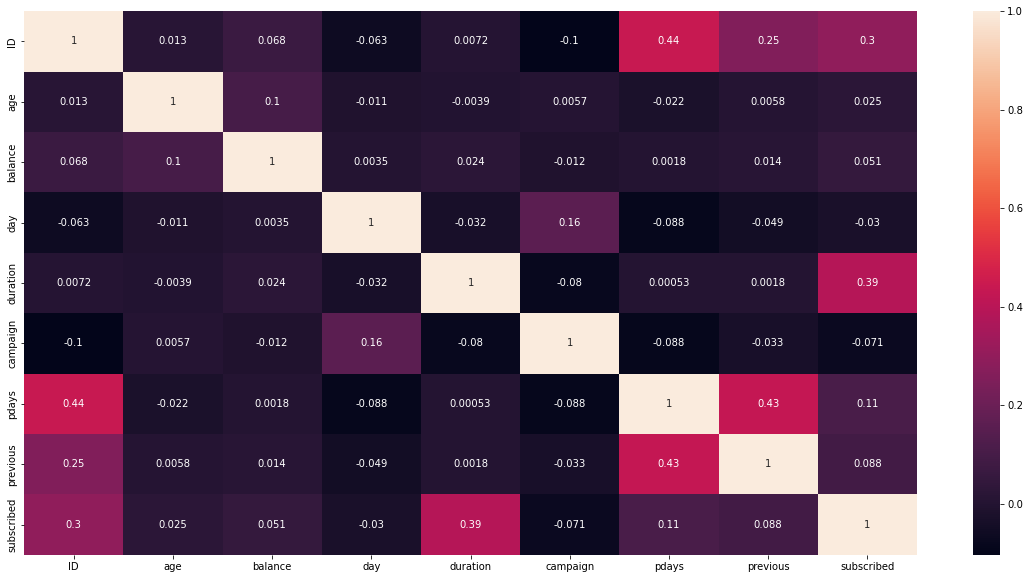

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)

In [11]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [13]:
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

<AxesSubplot:>

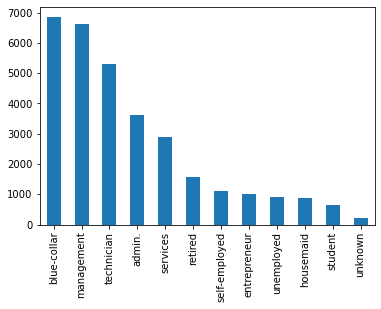

In [14]:
df['job'].value_counts().plot.bar()

In [15]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

<AxesSubplot:>

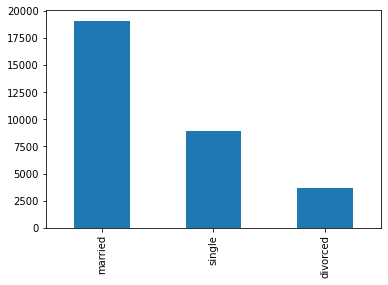

In [16]:
df['marital'].value_counts().plot.bar()

In [17]:
df['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

<AxesSubplot:>

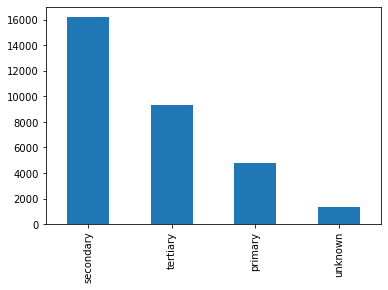

In [18]:
df['education'].value_counts().plot.bar()

In [19]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:>

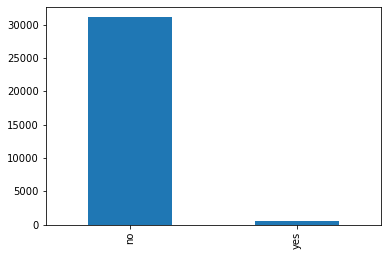

In [20]:
df['default'].value_counts().plot.bar()

In [21]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:>

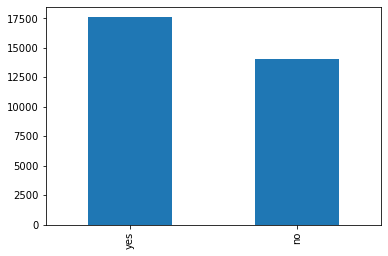

In [22]:
df['housing'].value_counts().plot.bar()

In [23]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

<AxesSubplot:>

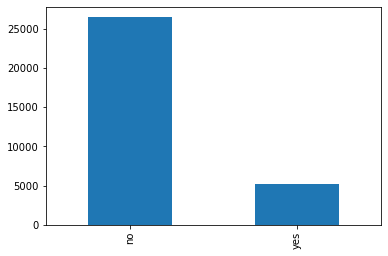

In [24]:
df['loan'].value_counts().plot.bar()

In [25]:
df['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

<AxesSubplot:>

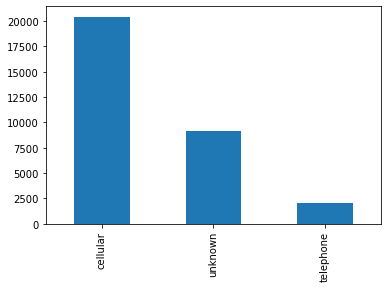

In [26]:
df['contact'].value_counts().plot.bar()

In [27]:
df['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

<AxesSubplot:>

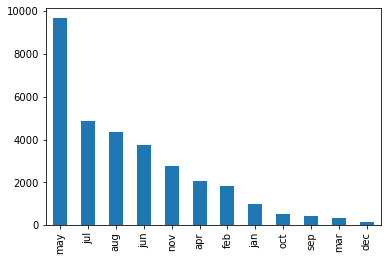

In [28]:
df['month'].value_counts().plot.bar()

In [29]:
df['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

<AxesSubplot:>

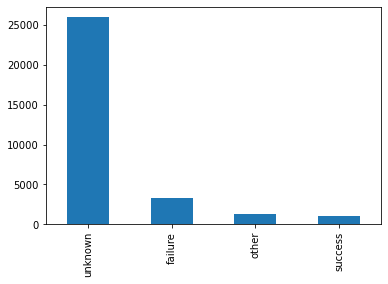

In [30]:
df['poutcome'].value_counts().plot.bar()

In [31]:
df['subscribed'].unique()

array([0, 1], dtype=int64)

In [32]:
df['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [33]:
df['subscribed'].value_counts(normalize = True)

0    0.882611
1    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

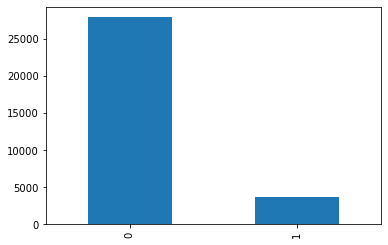

In [34]:
df['subscribed'].value_counts().plot.bar()

# Feature Engineering

In [35]:
train = pd.get_dummies(df)

In [36]:
train

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
31644,19710,32,312,7,37,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,38556,57,225,15,22,7,337,12,0,0,...,0,0,1,0,0,0,1,0,0,0


# Feature Selection

In [37]:
x = train.drop('subscribed',axis = 1)
y = train['subscribed']

In [38]:
x

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,19710,32,312,7,37,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,38556,57,225,15,22,7,337,12,0,0,...,0,0,1,0,0,0,1,0,0,0


In [39]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

# Model building

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [41]:
ada_model = AdaBoostClassifier()
ada_model

AdaBoostClassifier()

In [42]:
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [43]:
y_pred = ada_model.predict(x_test)

# Model Evaluation

In [44]:
accuracy_score(y_test,y_pred)

0.9091627172195893

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5587
           1       0.68      0.42      0.52       743

    accuracy                           0.91      6330
   macro avg       0.80      0.70      0.74      6330
weighted avg       0.90      0.91      0.90      6330



In [46]:
confusion_matrix(y_test,y_pred)

array([[5440,  147],
       [ 428,  315]], dtype=int64)

In [47]:
y_pred_prob = ada_model.predict_proba(x_test)
y_pred_prob

array([[0.52124764, 0.47875236],
       [0.51985882, 0.48014118],
       [0.52335854, 0.47664146],
       ...,
       [0.52613325, 0.47386675],
       [0.705741  , 0.294259  ],
       [0.52765702, 0.47234298]])

In [48]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

Text(0, 0.5, 'TPR')

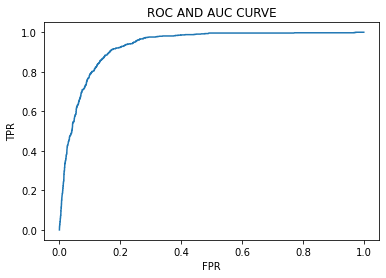

In [49]:
plt.title('ROC AND AUC CURVE')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [50]:
roc_auc_score(y_test,y_pred_prob[:,1])

0.930236409700369